<a href="https://colab.research.google.com/github/sabumjung/ThinkDSP/blob/master/FFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

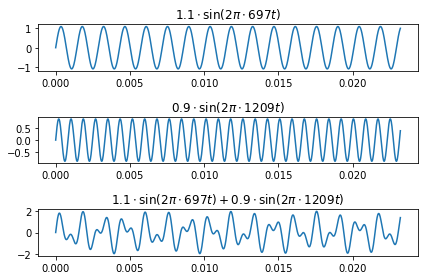

In [5]:
N = 1024
T = 1.0 / 44100.0
f1 = 697
f2 = 1209
t = np.linspace(0.0, N*T, N)
y1 = 1.1 * np.sin(2 * np.pi * f1 * t)
y2 = 0.9 * np.sin(2 * np.pi * f2 * t)
y = y1 + y2

plt.subplot(311)
plt.plot(t, y1)
plt.title(r"$1.1\cdot\sin(2\pi\cdot 697t)$")
plt.subplot(312)
plt.plot(t, y2)
plt.title(r"$0.9\cdot\sin(2\pi\cdot 1209t)$")
plt.subplot(313)
plt.plot(t, y)
plt.title(r"$1.1\cdot\sin(2\pi\cdot 697t) + 0.9\cdot\sin(2\pi\cdot 1209t)$")
plt.tight_layout()
plt.show()

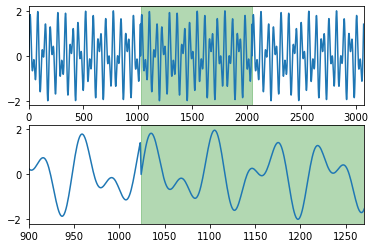

In [6]:
y2 = np.hstack([y, y, y])

plt.subplot(211)
plt.plot(y2)
plt.axvspan(N, N * 2, alpha=0.3, color='green')
plt.xlim(0, 3 * N)

plt.subplot(212)
plt.plot(y2)
plt.axvspan(N, N * 2, alpha=0.3, color='green')
plt.xlim(900, 1270)

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


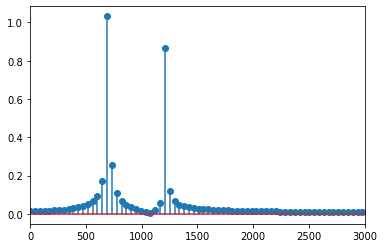

In [7]:
from scipy.fftpack import fft

yf = fft(y, N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

plt.stem(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim(0, 3000)

plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This signific

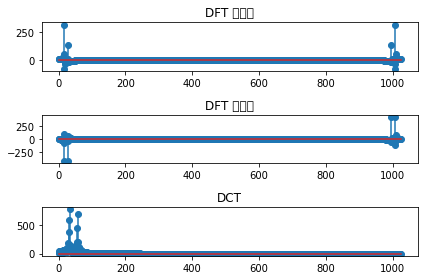

In [8]:
from scipy.fftpack import dct

dct_type = 2
yf2 = dct(y, dct_type, N)

plt.subplot(311)
plt.stem(np.real(yf))
plt.title("DFT 실수부")

plt.subplot(312)
plt.stem(np.imag(yf))
plt.title("DFT 허수부")

plt.subplot(313)
plt.stem(np.abs(yf2))
plt.title("DCT")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54805 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 52992 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_

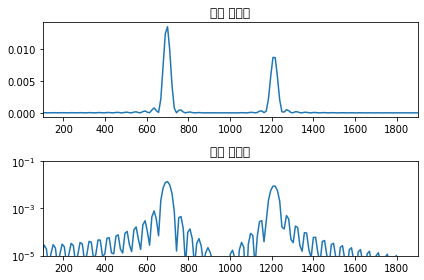

In [10]:
import scipy.signal
import scipy as sp

f, P = sp.signal.periodogram(y, 44100, nfft=2**12)

plt.subplot(211)
plt.plot(f, P)
plt.xlim(100, 1900)
plt.title("선형 스케일")

plt.subplot(212)
plt.semilogy(f, P)
plt.xlim(100, 1900)
plt.ylim(1e-5, 1e-1)
plt.title("로그 스케일")

plt.tight_layout()
plt.show()

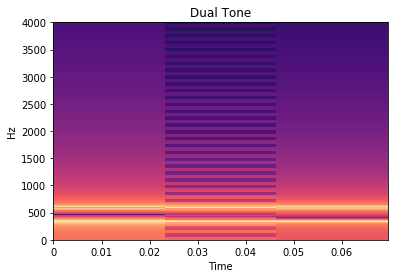

In [11]:
import librosa
import librosa.display

D = np.abs(librosa.stft(y))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='linear', x_axis='time')
plt.title('Dual Tone')
plt.ylim(0, 4000)
plt.show()


In [12]:
sr_octave, y_octave = sp.io.wavfile.read("octave.wav")

D_octave = np.abs(librosa.stft(y_octave))
librosa.display.specshow(librosa.amplitude_to_db(D_octave, ref=np.max), sr=sr_octave, y_axis='linear', x_axis='time')
plt.title('Octave')
plt.ylim(0, 2000)
plt.show()


FileNotFoundError: ignored